In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [116]:
from sklearn import datasets

iris = datasets.load_iris()

In [117]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [118]:
X = iris.data[:, (2, 3)]
y = iris.target

setosa_or_versi = (y==0) | (y==1)

X = X[setosa_or_versi]
y = y[setosa_or_versi]

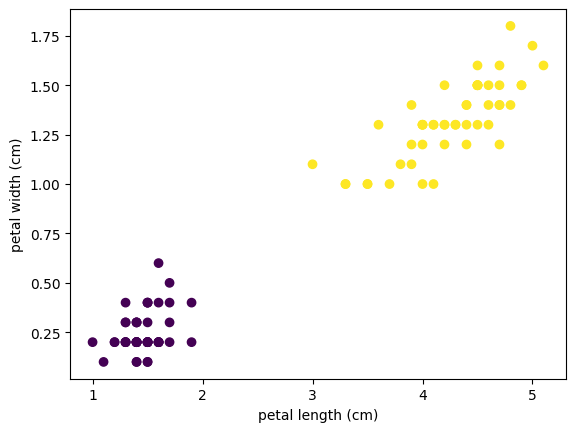

In [119]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

## I will be only performing classification on setosa and versicolor

In [120]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [121]:
linearsvc = LinearSVC(C=1, loss='hinge', random_state=42)


linearsvc.fit(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=1, loss='hinge', random_state=42)

In [122]:
svc = SVC(C=1, kernel='linear')


svc.fit(X_scaled, y)

SVC(C=1, kernel='linear')

In [123]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3, loss="hinge", alpha=1/(1*len(X)))


sgd.fit(X_scaled, y)

SGDClassifier(alpha=0.01)

In [124]:
print("Linear SVC: ", linearsvc.intercept_, linearsvc.coef_)
print("SVC: ", svc.intercept_, svc.coef_)
print("SGD: ", sgd.intercept_, sgd.coef_)

Linear SVC:  [0.29588877] [[1.0607458  1.00177835]]
SVC:  [0.32182521] [[1.04342638 0.94747825]]
SGD:  [0.28554453] [[1.18252229 1.06755864]]


In [143]:

w1 = -linearsvc.coef_[0, 0]/linearsvc.coef_[0, 1]
b1 = -linearsvc.intercept_[0]/linearsvc.coef_[0, 1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd.coef_[0, 0]/sgd.coef_[0, 1]
b3 = -sgd.intercept_[0]/sgd.coef_[0, 1]

In [144]:
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

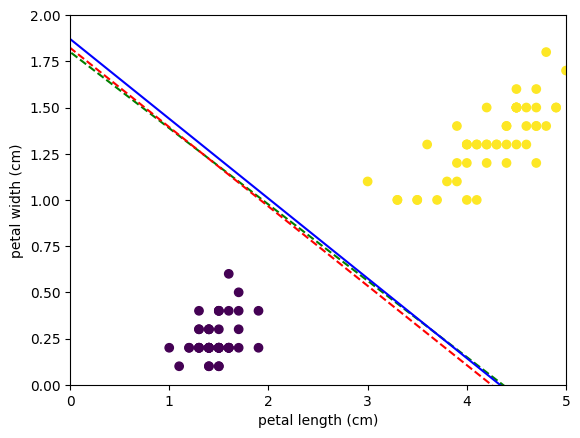

In [145]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.plot(line1[:, 0], line1[:, 1], 'g--', label='LinearSVC')
plt.plot(line2[:, 0], line2[:, 1], 'r--', label='SVC')
plt.plot(line3[:, 0], line3[:, 1], 'b-', label='SGDCLassifier}')
plt.axis([0,5,0,2])
plt.show()


In [ ]:
## They all did well, and close to eachother, which was the idea of this exercise